# Netflix Titles - Exploratory Data Analysis

A comprehensive EDA of Netflix content library including data cleaning, exploratory analysis, and advanced insights.

## Task 1-3: Load Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 Rows:")
print("="*80)
print(df.head())
print("\n" + "="*80)
print("Dataset Info:")
print("="*80)
df.info()
print("\n" + "="*80)
print("Missing Values Count:")
print("="*80)
print(df.isnull().sum())

Dataset Shape: (8807, 12)

First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2

## Data Cleaning (Tasks 4-7)

In [3]:
# Task 4: Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Task 5: Create year_added column
df['year_added'] = df['date_added'].dt.year

# Task 6: Fill missing values
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

# Task 7: Verify no rows were dropped
print(f"Dataset shape after cleaning: {df.shape}")
print(f"\nMissing values after cleaning:")
print(df[['date_added', 'year_added', 'country', 'rating']].isnull().sum())

Dataset shape after cleaning: (8807, 13)

Missing values after cleaning:
date_added    98
year_added    98
country        0
rating         0
dtype: int64


## Exploratory Data Analysis (Tasks 8-12)

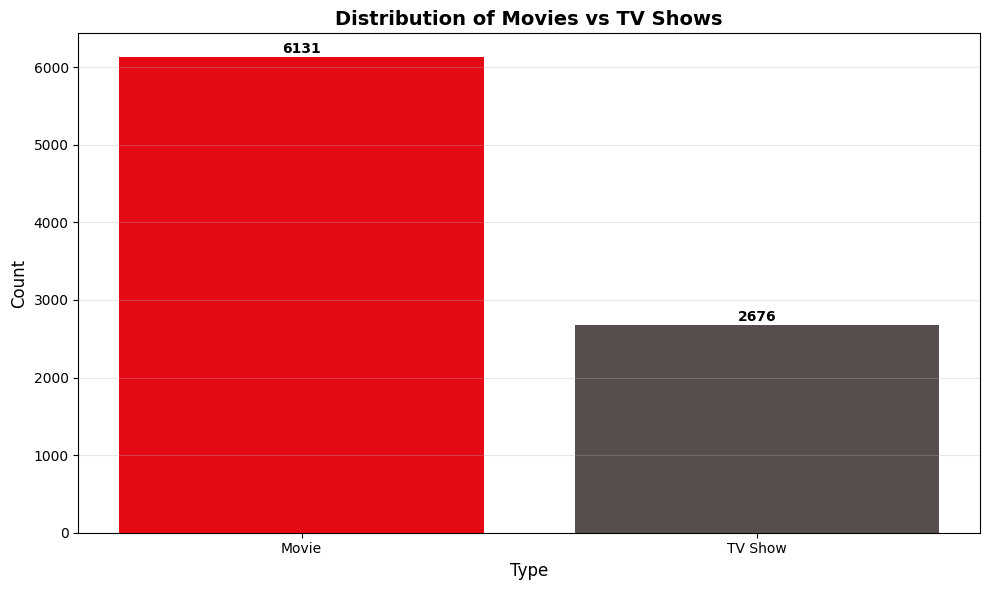

Movies vs TV Shows Count:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
type_counts = df['type'].value_counts()
ax.bar(type_counts.index, type_counts.values, color=['#E50914', '#564D4D'])
ax.set_title('Distribution of Movies vs TV Shows', fontsize=14, fontweight='bold')
ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(type_counts.values):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("Movies vs TV Shows Count:")
print(type_counts)

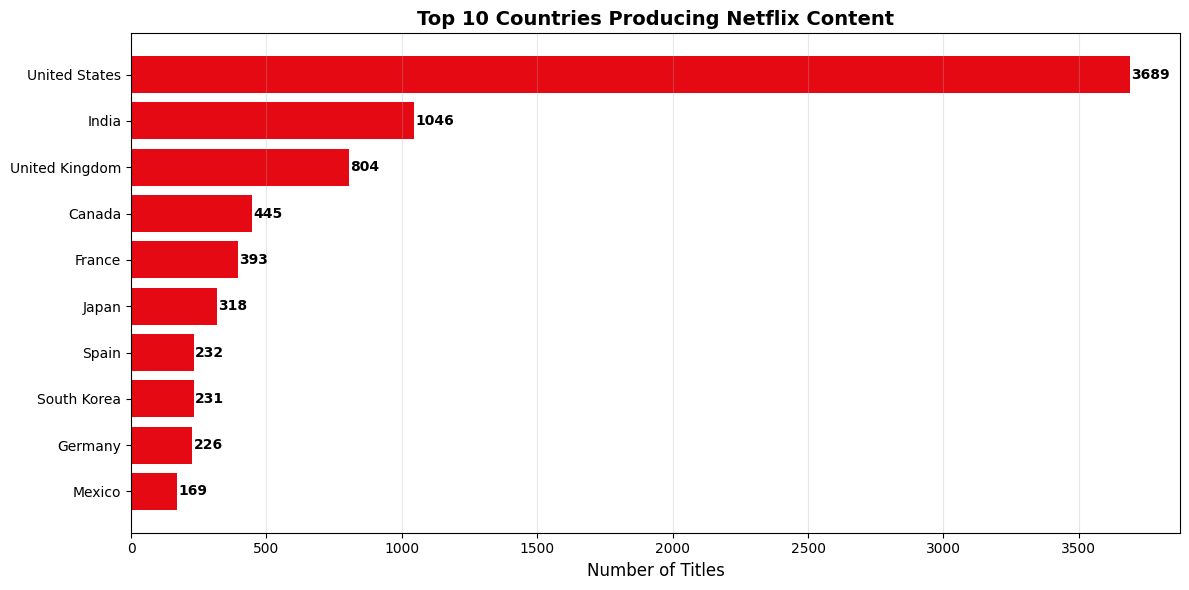

Top 10 Countries Producing Content:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [ ]:
countries_expanded = df[df['country'] != 'Unknown'].copy()
countries_expanded['country'] = countries_expanded['country'].str.split(', ')
countries_expanded = countries_expanded.explode('country')
countries_expanded['country'] = countries_expanded['country'].str.strip()

country_counts = countries_expanded['country'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(country_counts)), country_counts.values, color='#E50914')
ax.set_yticks(range(len(country_counts)))
ax.set_yticklabels(country_counts.index)
ax.invert_yaxis()
ax.set_title('Top 10 Countries Producing Netflix Content', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Titles', fontsize=12)
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(country_counts.values):
    ax.text(v + 5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("Top 10 Countries Producing Content:")
print(country_counts)

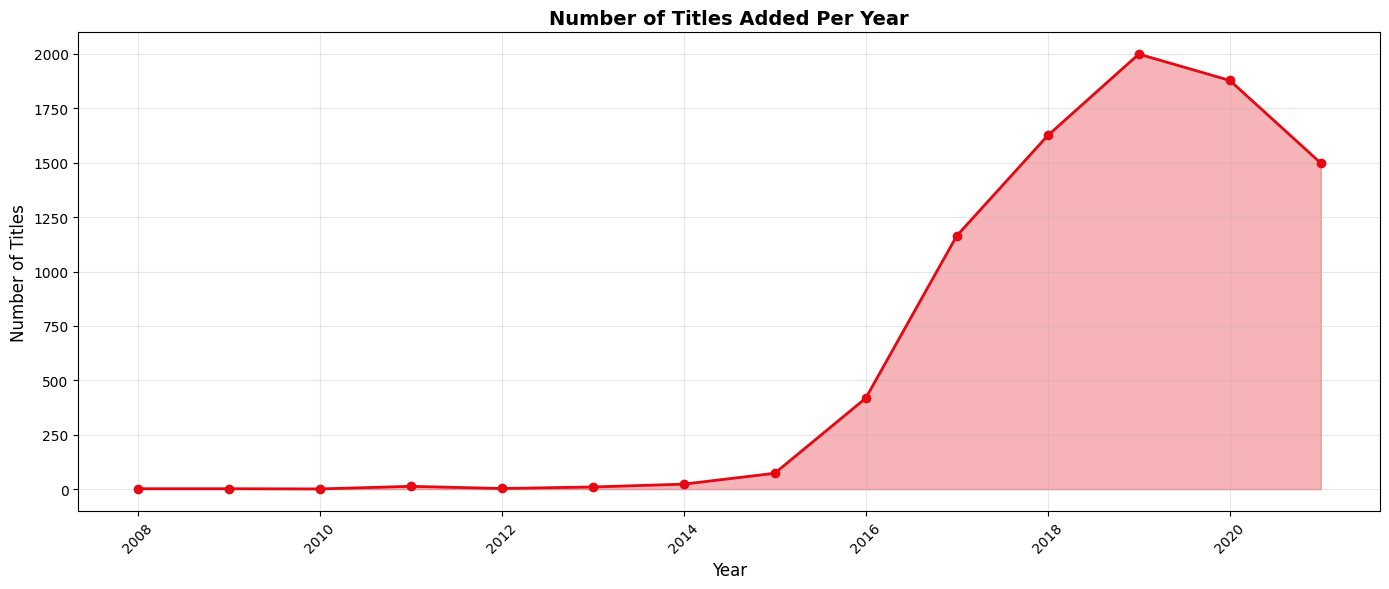

Titles Added Per Year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


In [6]:
# Task 10: Number of titles added per year
year_counts = df['year_added'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6, color='#E50914')
ax.fill_between(year_counts.index, year_counts.values, alpha=0.3, color='#E50914')
ax.set_title('Number of Titles Added Per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Titles Added Per Year:")
print(year_counts)

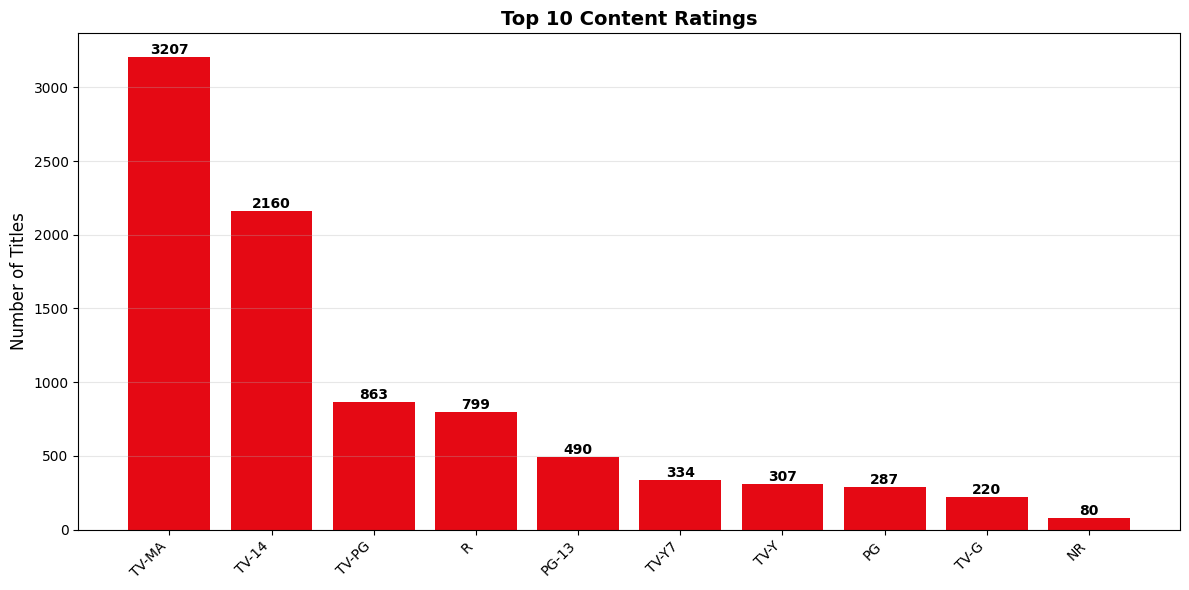

Top 10 Content Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


In [ ]:

rating_counts = df['rating'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(rating_counts)), rating_counts.values, color='#E50914')
ax.set_xticks(range(len(rating_counts)))
ax.set_xticklabels(rating_counts.index, rotation=45, ha='right')
ax.set_title('Top 10 Content Ratings', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Titles', fontsize=12)
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(rating_counts.values):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("Top 10 Content Ratings:")
print(rating_counts)

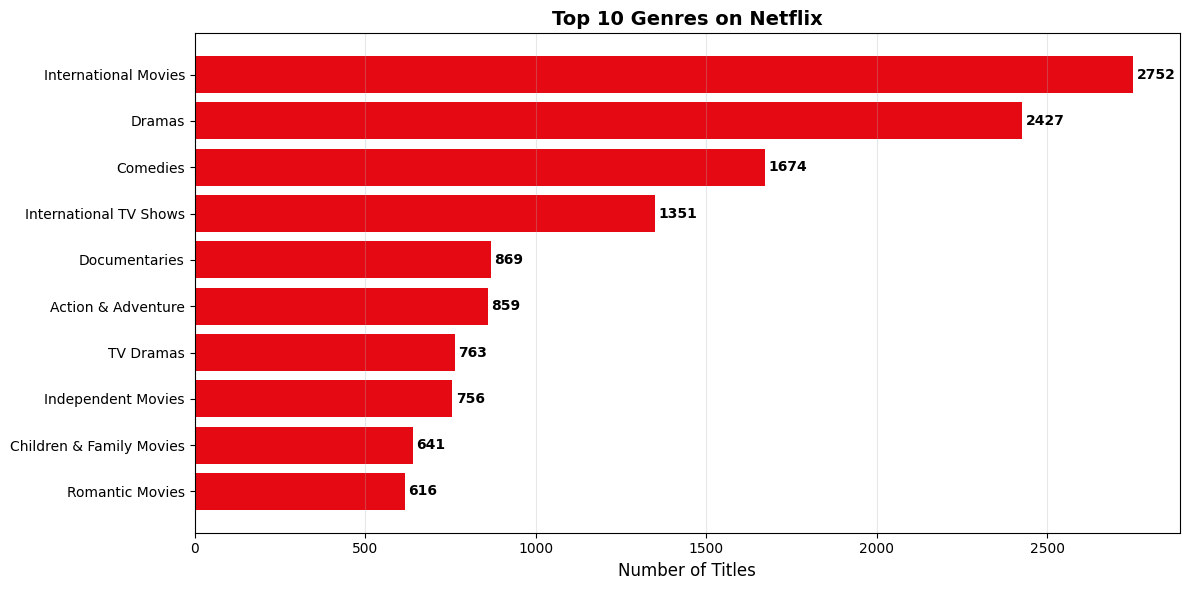

Top 10 Genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [ ]:
genres_expanded = df.copy()
genres_expanded['listed_in'] = genres_expanded['listed_in'].str.split(', ')
genres_expanded = genres_expanded.explode('listed_in')
genres_expanded['listed_in'] = genres_expanded['listed_in'].str.strip()

genre_counts = genres_expanded['listed_in'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(genre_counts)), genre_counts.values, color='#E50914')
ax.set_yticks(range(len(genre_counts)))
ax.set_yticklabels(genre_counts.index)
ax.invert_yaxis()
ax.set_title('Top 10 Genres on Netflix', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Titles', fontsize=12)
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(genre_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("Top 10 Genres:")
print(genre_counts)

## Feature Engineering (Tasks 13-14)

Average Content Age by Type:
             mean  median       std  count
type                                      
Movie    5.727777     2.0  9.742631   6131
TV Show  2.224981     0.0  5.175744   2578




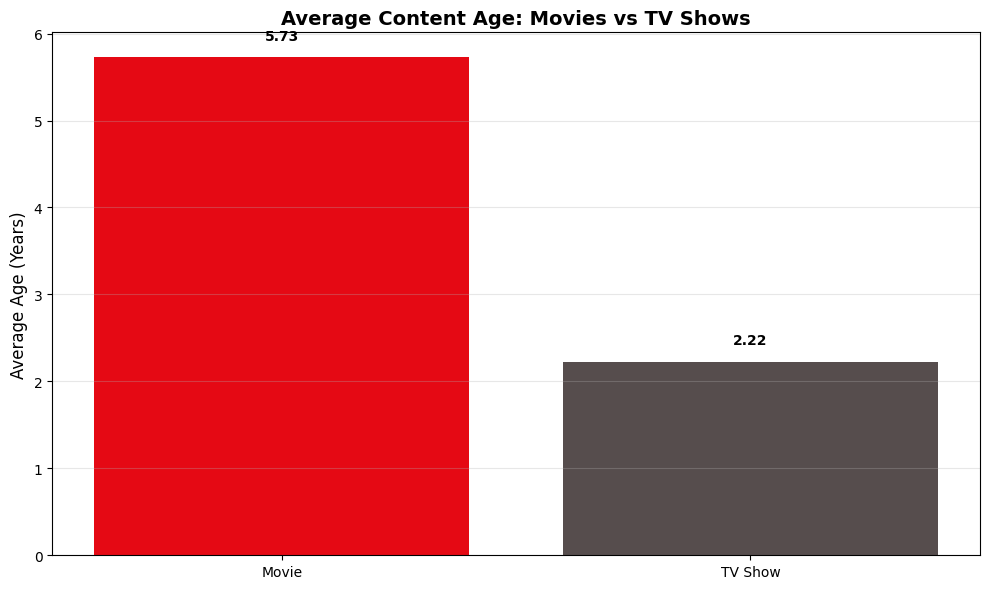

In [ ]:
df['content_age'] = df['year_added'] - df['release_year']

age_by_type = df.groupby('type')['content_age'].agg(['mean', 'median', 'std', 'count'])
print("Average Content Age by Type:")
print(age_by_type)
print("\n")

# Visualize the comparison
fig, ax = plt.subplots(figsize=(10, 6))
content_age_by_type = df.groupby('type')['content_age'].mean()
ax.bar(content_age_by_type.index, content_age_by_type.values, color=['#E50914', '#564D4D'])
ax.set_title('Average Content Age: Movies vs TV Shows', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Age (Years)', fontsize=12)
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(content_age_by_type.values):
    ax.text(i, v + 0.2, f'{v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## Advanced Analysis (Tasks 15-17)

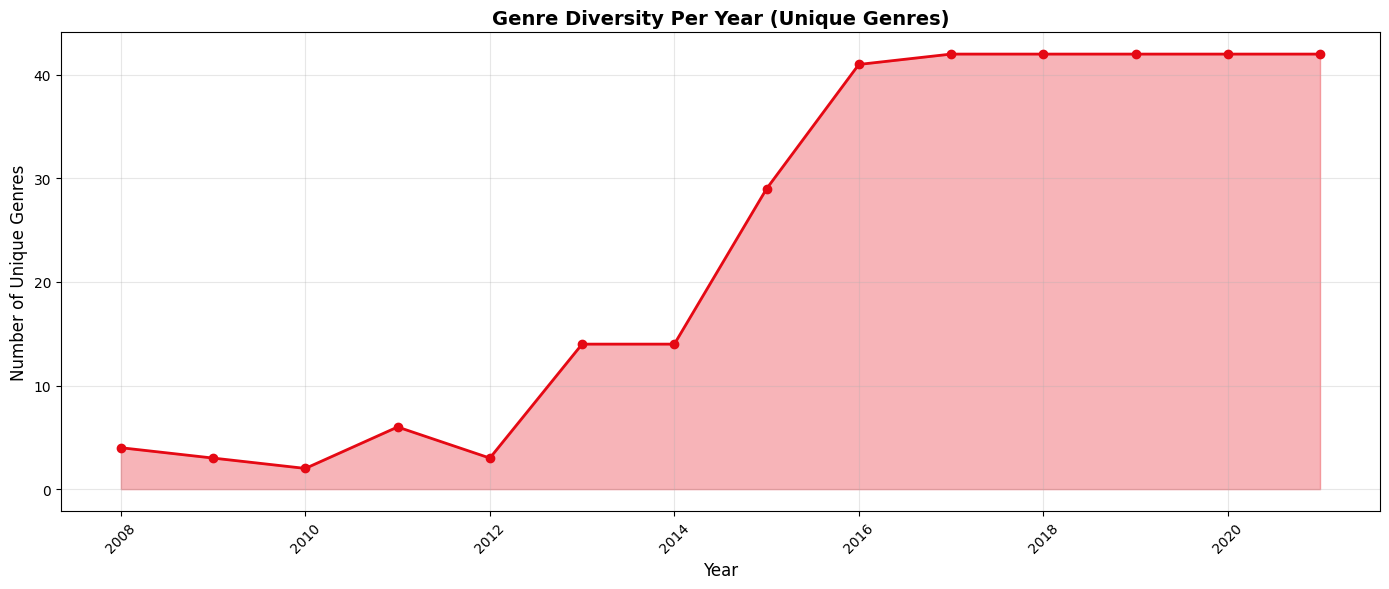

Unique Genres Per Year:
year_added
2008.0     4
2009.0     3
2010.0     2
2011.0     6
2012.0     3
2013.0    14
2014.0    14
2015.0    29
2016.0    41
2017.0    42
2018.0    42
2019.0    42
2020.0    42
2021.0    42
Name: listed_in, dtype: int64


In [ ]:
genres_by_year = genres_expanded.groupby('year_added')['listed_in'].nunique().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(genres_by_year.index, genres_by_year.values, marker='o', linewidth=2, markersize=6, color='#E50914')
ax.fill_between(genres_by_year.index, genres_by_year.values, alpha=0.3, color='#E50914')
ax.set_title('Genre Diversity Per Year (Unique Genres)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Unique Genres', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Unique Genres Per Year:")
print(genres_by_year)

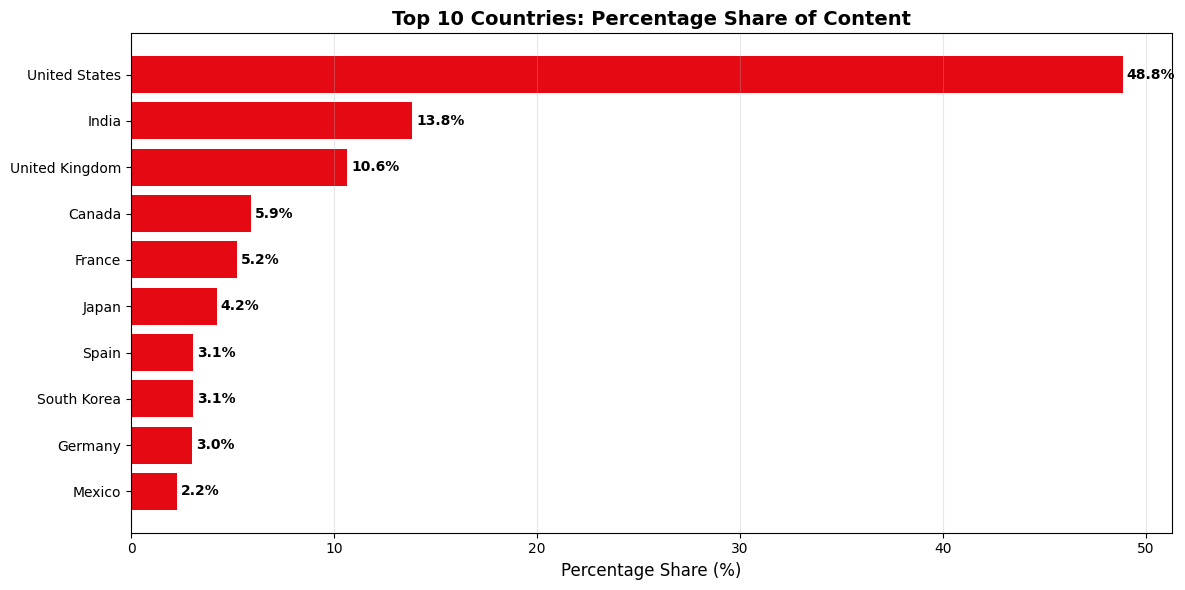

Country Percentage Share (Top 10):
country
United States     48.841520
India             13.848802
United Kingdom    10.644777
Canada             5.891699
France             5.203231
Japan              4.210248
Spain              3.071627
South Korea        3.058387
Germany            2.992189
Mexico             2.237522
Name: count, dtype: float64

Total percentage: 100.0%


In [ ]:
country_percentage = (country_counts / country_counts.sum()) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(country_percentage)), country_percentage.values, color='#E50914')
ax.set_yticks(range(len(country_percentage)))
ax.set_yticklabels(country_percentage.index)
ax.invert_yaxis()
ax.set_title('Top 10 Countries: Percentage Share of Content', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage Share (%)', fontsize=12)
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(country_percentage.values):
    ax.text(v + 0.2, i, f'{v:.1f}%', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("Country Percentage Share (Top 10):")
print(country_percentage)
print(f"\nTotal percentage: {country_percentage.sum():.1f}%")

Mature Content Percentage by Type and Year:
type             Movie     TV Show
year_added                        
2008.0      100.000000  100.000000
2009.0      100.000000    0.000000
2010.0        0.000000    0.000000
2011.0       23.076923    0.000000
2012.0       33.333333    0.000000
2013.0       16.666667   50.000000
2014.0       47.368421   75.000000
2015.0       48.214286   17.647059
2016.0       50.592885   28.484848
2017.0       50.059595   27.692308
2018.0       47.291835   47.938144
2019.0       46.980337   46.782609
2020.0       44.392523   48.653199
2021.0       44.914401   46.138614




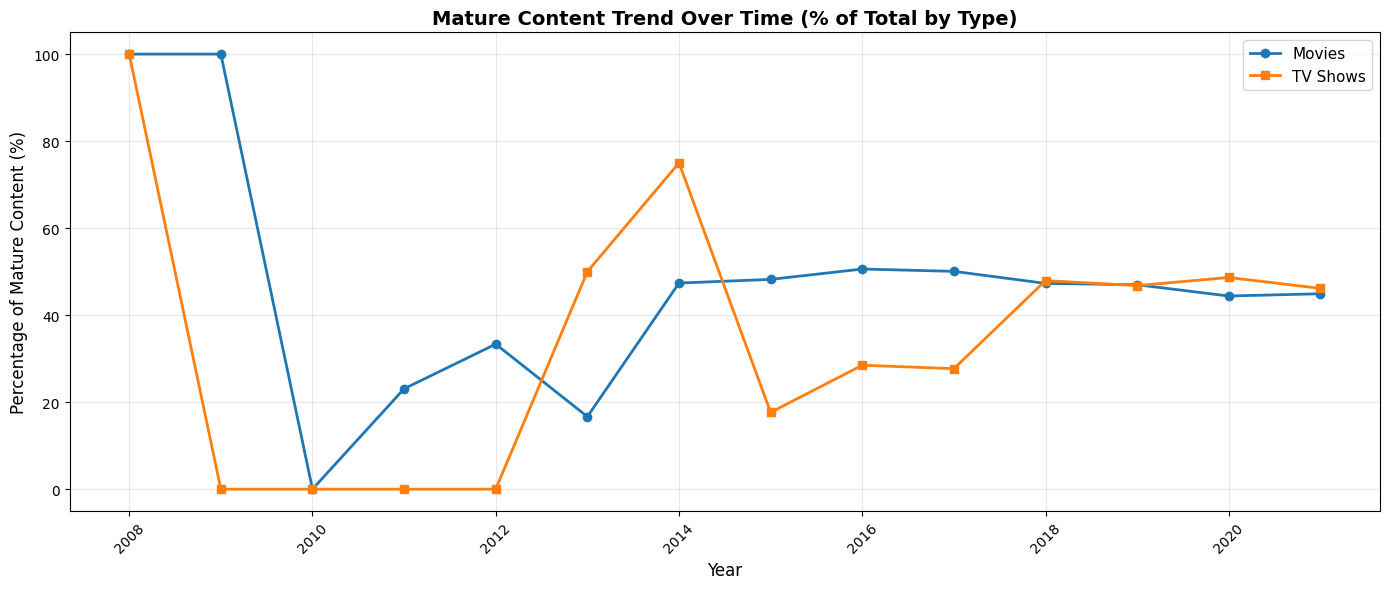


Mature Content Count by Type and Year:
type        Movie  TV Show
year_added                
2008.0          1        1
2009.0          2        0
2011.0          3        0
2012.0          1        0
2013.0          1        2
2014.0          9        3
2015.0         27        3
2016.0        128       47
2017.0        420       90
2018.0        585      186
2019.0        669      269
2020.0        570      289
2021.0        446      233


In [ ]:

mature_ratings = ['TV-MA', 'R', 'NC-17']
df['is_mature'] = df['rating'].isin(mature_ratings)

# Get mature content by year and type
mature_by_year = df[df['is_mature']].groupby(['year_added', 'type']).size().unstack(fill_value=0)
total_by_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

mature_percentage = (mature_by_year / total_by_year * 100).fillna(0)

# Print statistics
print("Mature Content Percentage by Type and Year:")
print(mature_percentage)
print("\n")

 
fig, ax = plt.subplots(figsize=(14, 6))
years = mature_percentage.index

if 'Movie' in mature_percentage.columns:
    ax.plot(years, mature_percentage['Movie'], marker='o', label='Movies', linewidth=2, markersize=6)
if 'TV Show' in mature_percentage.columns:
    ax.plot(years, mature_percentage['TV Show'], marker='s', label='TV Shows', linewidth=2, markersize=6)

ax.set_title('Mature Content Trend Over Time (% of Total by Type)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of Mature Content (%)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMature Content Count by Type and Year:")
print(mature_by_year)

## Summary

All exploratory data analysis tasks have been completed:
- ✅ Data loading and initial exploration
- ✅ Data cleaning with proper datetime conversion and missing value handling
- ✅ Comprehensive EDA with visualizations
- ✅ Feature engineering with content_age analysis
- ✅ Advanced analysis including genre diversity, country dependency, and mature content trends

Key findings show Netflix's content growth, geographic diversity, and rating patterns across movies and TV shows.